<a href="https://colab.research.google.com/github/indl1670/KST_Project/blob/maskrcnn/mrcnn_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git '/content/drive/MyDrive/kst_project/oneCycle/Mask_RCNN2'

Cloning into '/content/drive/MyDrive/kst_project/oneCycle/Mask_RCNN2'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 15.73 MiB/s, done.
Resolving deltas: 100% (565/565), done.
Checking out files: 100% (76/76), done.


In [ ]:
!pip3 install tensorboard==1.15.0 tensorflow==1.15.0 tensorflow-estimator==1.15.1 tensorflow-gpu==1.15.2 tensorflow-gpu-estimator==2.1.0 Keras==2.2.5 Keras-Applications==1.0.8 Keras-Preprocessing==1.1.0

In [ ]:
!pip3 install h5py==2.10.0 --force-reinstall

In [ ]:
!python3 '/content/drive/MyDrive/kst_project/oneCycle/Mask_RCNN2/samples/coco/coco.py' train --dataset='/content/drive/Shareddrives/KST_Project/case1/images' --model=coco

Using TensorFlow backend.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

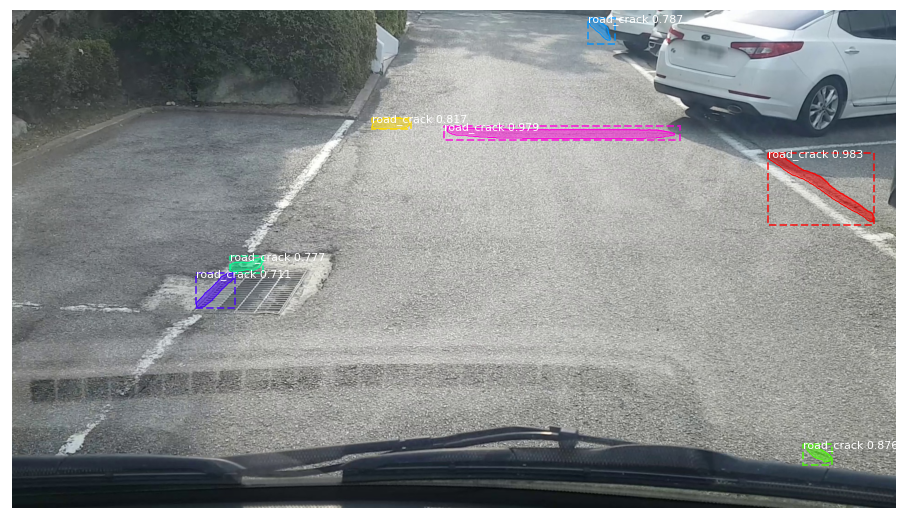

In [1]:
# polyline
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory 경로 저장
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/kst_project/oneCycle/Mask_RCNN2/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils

# MS-COCO 기반으로 Pretrained 된 모델을 로딩
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# MRCNN 모델 경로 저장
MODEL_DIR = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# 자체 데이터셋 trained weight file 경로 저장
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "logs/mask_rcnn_kst_case1_test_0013.h5")

# 이미지 경로 저장
IMG_DIR = os.path.abspath("/content/drive/Shareddrives/KST_Project/case1/images/")

# 테스트 이미지폴더 경로 저장
IMAGE_DIR = os.path.join(IMG_DIR, "test2021/")

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

# config 세부사항 출력
config = InferenceConfig()
config.display()

# inference 모드에서 모델 객체 생성
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# MS-COCO에서 trained weights 로드
model.load_weights(
    COCO_MODEL_PATH, by_name=True)

# test2021(이미지 폴더)에서 무작위 이미지 선정
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# class명 저장(0: 'border_stone', 1: 'side_sphere', 2: 'Manhole', 3: 'center_separato', 4: 'PE_barrier', 5: 'temporary_safety_barrier')
class_names = ['BG', 'road_crack']

# Detection
results = model.detect([image], verbose=1)

# 발견된 객체 개수 확인
print(results[0]['class_ids'].shape) 

# Visualize 결과
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

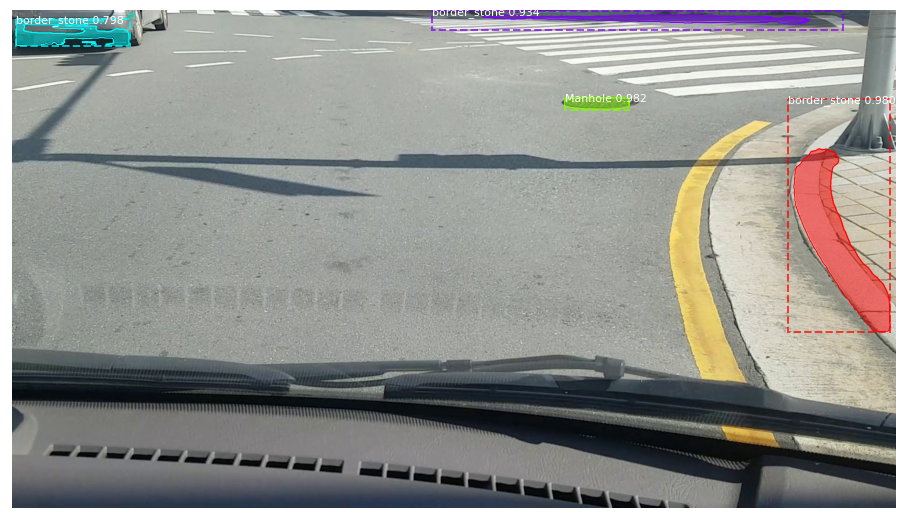

In [4]:
# polygon
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory 경로 저장
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/kst_project/oneCycle/Mask_RCNN2/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils

# MS-COCO 기반으로 Pretrained 된 모델을 로딩
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# MRCNN 모델 경로 저장
MODEL_DIR = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# 자체 데이터셋 trained weight file 경로 저장
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "logs/mask_rcnn_kst_case2_0006.h5")

# 이미지 경로 저장
IMG_DIR = os.path.abspath("/content/drive/Shareddrives/KST_Project/final_img/")

# 테스트 이미지폴더 경로 저장
IMAGE_DIR = os.path.join(IMG_DIR, "dataset/test2021/")

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

# config 세부사항 출력
config = InferenceConfig()
config.display()

# inference 모드에서 모델 객체 생성
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# MS-COCO에서 trained weights 로드
model.load_weights(
    COCO_MODEL_PATH, by_name=True)

# test2021(이미지 폴더)에서 무작위 이미지 선정
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# class명 저장(0: 'border_stone', 1: 'side_sphere', 2: 'Manhole', 3: 'center_separato', 4: 'PE_barrier', 5: 'temporary_safety_barrier')
class_names = ['BG', 'border_stone', 'side_sphere', 'Manhole', 'center_separato', 'PE_barrier', 'temporary_safety_barrier']

# Detection
results = model.detect([image], verbose=1)

# 발견된 객체 개수 확인
print(results[0]['class_ids'].shape) 

# Visualize 결과
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])